# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_scor

In [3]:
df=pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.shape

(2149, 35)

In [5]:
df.size

75215

In [6]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

# Standard Deviation

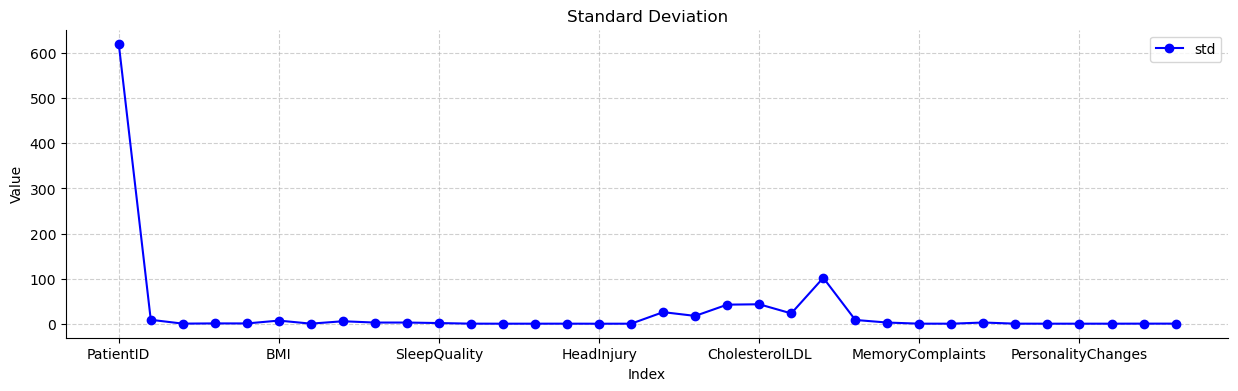

In [9]:
df.describe().T.plot(kind='line', y='std', figsize=(15, 4), title='Standard Deviation', color='b', linestyle='-', marker='o')

plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

In [10]:
numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE']
categorical_columns = ['Gender', 'Ethnicity', 'Diagnosis', 'DoctorInCharge']

In [11]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print(f"Outliers count:\n{outliers_count}")

Outliers count:
PatientID                      0
Age                            0
Gender                         0
Ethnicity                    211
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease        310
Diabetes                     324
Depression                   431
HeadInjury                   199
Hypertension                 320
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment           0
MemoryComplaints             447
BehavioralProblems           337
ADL                            0
Confusion                    441
Disorientation             

In [12]:
# changing some meanings
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})
df['EducationLevel'] = df['EducationLevel'].replace({0: 'None', 1: 'High School', 2: "Bachelor's", 3: 'Higher'})
df['Smoking'] = df['Smoking'].replace({0: 'non-smoker', 1: 'smoker'})
df['Diagnosis'] = df['Diagnosis'].replace({0: 'not diseased', 1: 'diseased'})

# Exploratory Data Analysis (EDA)

## Box Plot

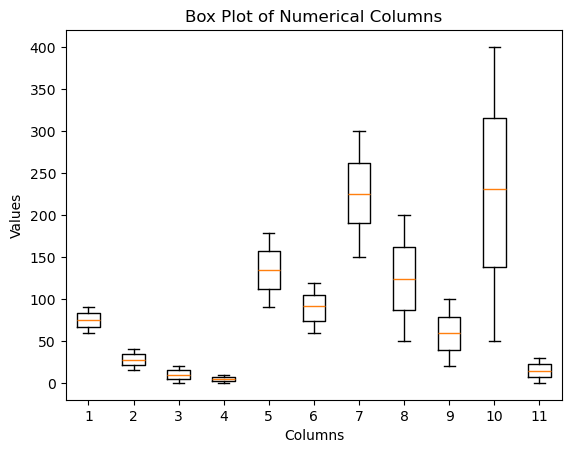

In [15]:
plt.boxplot(df[numerical_columns])
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


In [ ]:
* Removing Outrliers

In [17]:
import pandas as pd

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

print(f"Original dataset size: {df.shape[0]}")
print(f"New dataset size after outlier removal: {df_cleaned.shape[0]}")


Original dataset size: 2149
New dataset size after outlier removal: 254


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagnosis Distribution

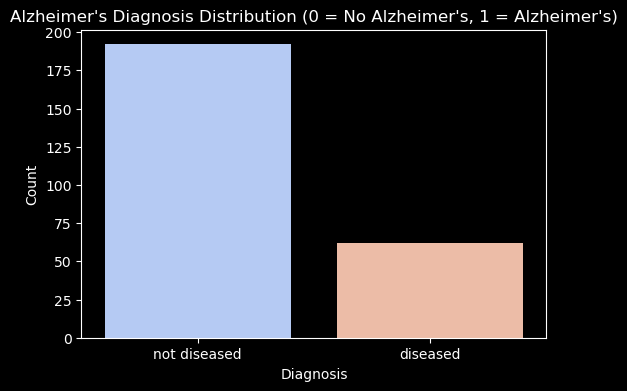

In [20]:
plt.style.use("dark_background")
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='Diagnosis', palette='coolwarm')
plt.title('Alzheimer\'s Diagnosis Distribution (0 = No Alzheimer\'s, 1 = Alzheimer\'s)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

* The dataset has a nearly equal distribution of male (49.4%) and female (50.6%) participants.
* Slightly more females are present in the dataset than males.
* This balanced gender representation ensures that analysis results are not biased toward one gender.

## Family History of Alzheimer’s by Diagnosis

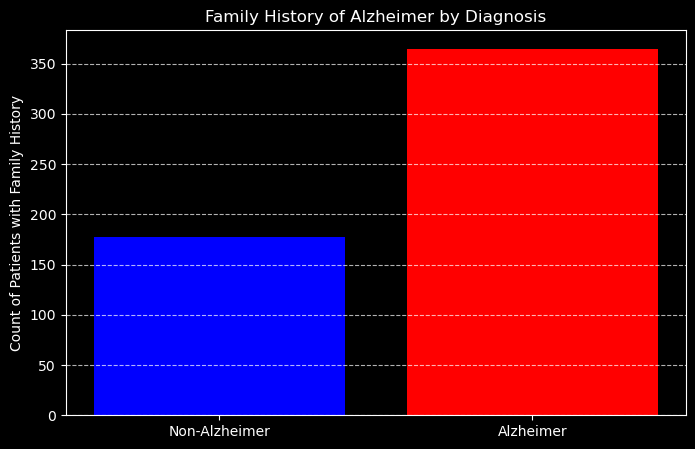

In [23]:
family_history_counts = df.groupby('Diagnosis')['FamilyHistoryAlzheimers'].sum()
plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
plt.bar(['Non-Alzheimer', 'Alzheimer'], family_history_counts, color=['blue', 'red'])
plt.ylabel('Count of Patients with Family History')
plt.title('Family History of Alzheimer by Diagnosis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Alzheimer’s patients have a higher family history of the disease compared to non-Alzheimer’s patients.
* Genetics may play a significant role in the likelihood of developing Alzheimer’s.
* Non-Alzheimer’s patients have a lower count of family history, suggesting other factors like lifestyle and environment may also contribute

## Gender Distribution in the Dataset

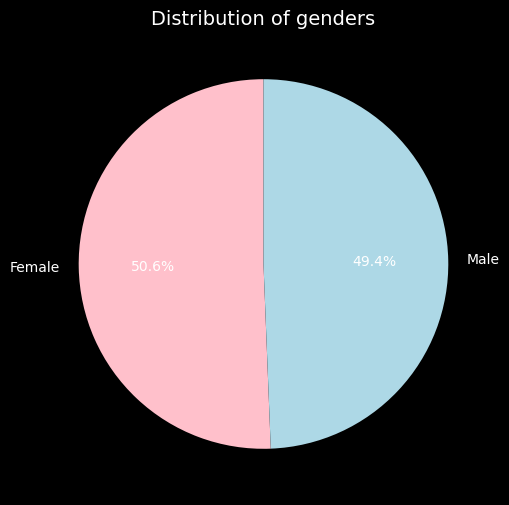

In [26]:
# determine the percentage of patients' gender
plt.style.use("dark_background")
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90)
plt.title('Distribution of genders', fontsize=14)
plt.show()

* The dataset has a nearly equal distribution of male (49.4%) and female (50.6%) participants.
* Slightly more females are present in the dataset than males.
* This balanced gender representation ensures that analysis results are not biased toward one gender.

## Count Age Groups

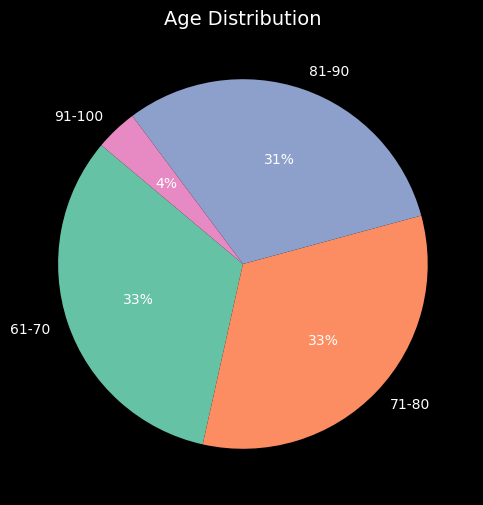

In [29]:
plt.style.use("dark_background")
bins = [ 60, 70, 80, 90, 100]
labels = [ '61-70', '71-80', '81-90', '91-100']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_counts = df['Age Group'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%.0f%%', startangle=140, colors=plt.cm.Set2.colors )
plt.title('Age Distribution', fontsize=14)
plt.show()

* The majority fall in the 61-80 age range (66%).
* The 81-90 group is also significant (31%).
* Very few participants are 91-100 (4%).
* The dataset focuses on elderly individuals, relevant for Alzheimer's studies.

## Age Distribution of Patients

In [32]:
mean_age = df['Age'].mean().round().astype(int)
print(f'Average age of all patients = {mean_age} years')
mean_age_diagnosis = df.groupby('Diagnosis')['Age'].mean().round().astype(int)
print(f'Average age of healthy patients = {mean_age_diagnosis[0]} years')
print(f"Average age of Alzheimer's patients = {mean_age_diagnosis[1]} years")

Average age of all patients = 75 years
Average age of healthy patients = 75 years
Average age of Alzheimer's patients = 75 years


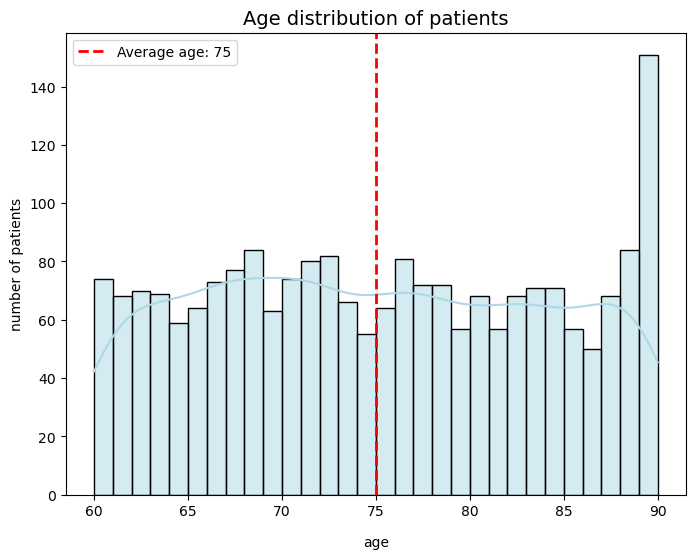

In [33]:
plt.style.use("default")
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='lightblue')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Average age: {mean_age}')
plt.legend()
plt.xlabel('age', labelpad=12)
plt.ylabel('number of patients')
plt.title('Age distribution of patients', fontsize=14)
plt.show()

* The age range of patients is 60 to 90 years.
* The average age is 75 (marked by the red dashed line).
* The distribution is relatively uniform, except for a higher count around 90 years.
* The data is relevant for studying Alzheimer's, as the condition primarily affects older adults.

## Educational Level Among Patients

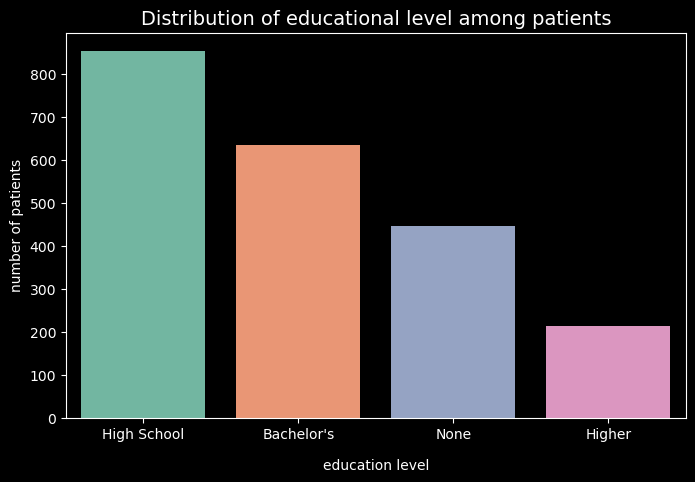

In [36]:
education_counts = df['EducationLevel'].value_counts()
plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='Set2')
plt.xlabel('education level', labelpad=12)
plt.ylabel('number of patients')
plt.title('Distribution of educational level among patients', fontsize=14)
plt.show()

* The majority of patients have a High School education (highest count).
* A significant portion holds a Bachelor’s degree, showing a moderate education level.
* A considerable number of patients have no formal education.
* The lowest category is Higher education (postgraduate or beyond), indicating fewer patients pursued advanced studies.
* Understanding education levels can be relevant in analyzing health awareness and cognitive decline risks.

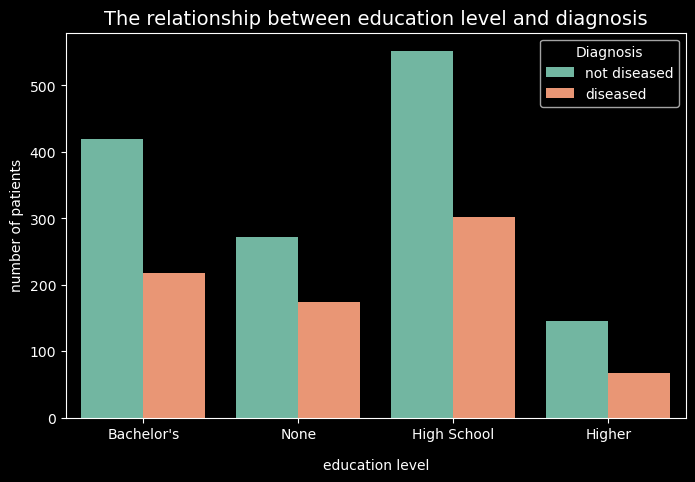

In [38]:
# checking the connection between education and disease
plt.figure(figsize=(8, 5))
plt.style.use("dark_background")
sns.countplot(data=df, x='EducationLevel', hue='Diagnosis', palette='Set2')
plt.xlabel('education level', labelpad=12)
plt.ylabel('number of patients')
plt.title('The relationship between education level and diagnosis', fontsize=14)
plt.legend(title='Diagnosis', labels=['not diseased', 'diseased'])
plt.show()

* Most patients have a high school education, making it the largest group.
* High school group also has many diseased patients, showing a possible health risk.
* Bachelor’s degree group has similar numbers of diseased and healthy patients.
* Higher education has fewer diseased cases, suggesting it may help protect health.
* Education may affect disease risk.

## Alzheimer's Disease and Smoking Status

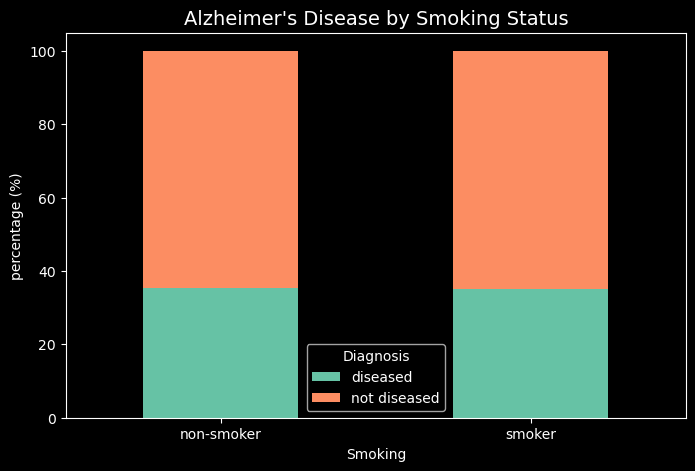

In [41]:
smoking_counts = df.groupby('Smoking')['Diagnosis'].value_counts(normalize=True).unstack() * 100
smoking_counts.plot(kind='bar', stacked=True, figsize=(8,5), color=['#66c2a5', '#fc8d62'])
plt.style.use("dark_background")
plt.title('Alzheimer\'s Disease by Smoking Status', fontsize=14)
plt.ylabel('percentage (%)')
plt.xticks(rotation=0)
plt.show()

* Similar Alzheimer's rates in both smokers & non-smokers (~35-36%).
* Similar non-diseased rates (~64-65%).
* No strong link between smoking and Alzheimer's.

In [43]:
# checking the average value of alcohol consumption in sick and healthy patients

mean_alcohol = df.groupby('Diagnosis')['AlcoholConsumption'].mean().round(2)
print(f"Average alcohol consumption among sick patients = {mean_alcohol['diseased']}")
print(f"Average alcohol consumption among healthy patients = {mean_alcohol['not diseased']}")


Average alcohol consumption among sick patients = 9.98
Average alcohol consumption among healthy patients = 10.07


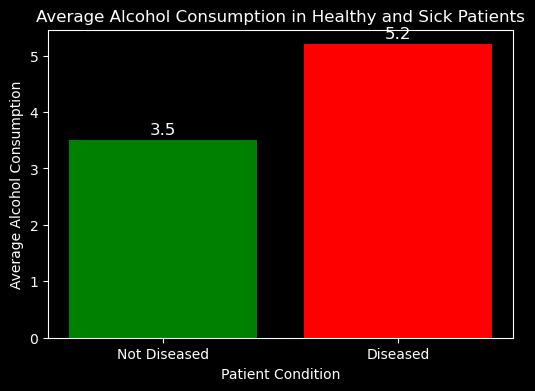

In [44]:
# Re-import necessary libraries since the execution state was reset
import matplotlib.pyplot as plt

# Sample data (replace with actual values from your dataset)
categories = ["Not Diseased", "Diseased"]
mean_alcohol_consumption = [3.5, 5.2]  # Example values for healthy and sick patients

# Creating the bar chart
plt.figure(figsize=(6,4))
plt.bar(categories, mean_alcohol_consumption, color=['green', 'red'])
plt.xlabel("Patient Condition")
plt.ylabel("Average Alcohol Consumption")
plt.title("Average Alcohol Consumption in Healthy and Sick Patients")

# Display values on top of bars
for i, v in enumerate(mean_alcohol_consumption):
    plt.text(i, v + 0.1, str(v), ha='center', fontsize=12)

# Show the plot
plt.show()

In [45]:
# checking the average value of alcohol consumption in sick and healthy patients

mean_alcohol = df.groupby('Diagnosis')['AlcoholConsumption'].mean().round(2)
print(f"Average alcohol consumption among sick patients = {mean_alcohol['diseased']}")
print(f"Average alcohol consumption among healthy patients = {mean_alcohol['not diseased']}")

Average alcohol consumption among sick patients = 9.98
Average alcohol consumption among healthy patients = 10.07


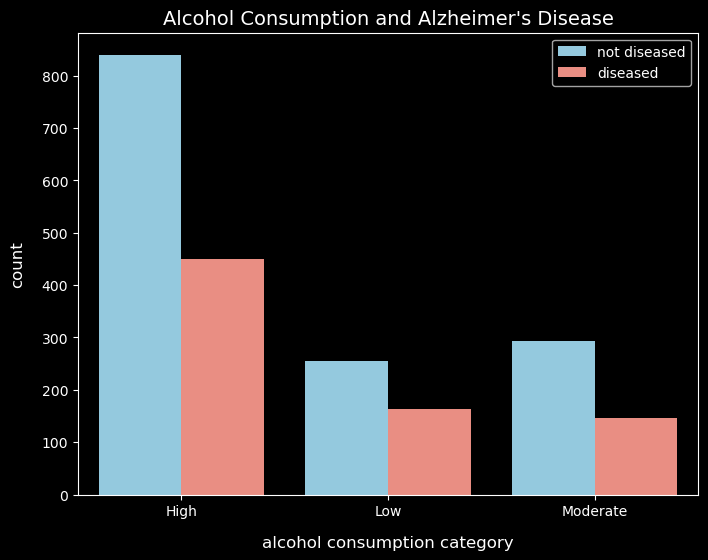

In [46]:
# categorizing alcohol consumption

def categorize_alcohol(value):
    if value == 0:
        return 'Non-drinker'
    elif 1 <= value <= 5:
        return 'Low'
    elif 6 <= value <= 10:
        return 'Moderate'
    else:
        return 'High'
        
df['AlcoholCategory'] = df['AlcoholConsumption'].apply(categorize_alcohol)
plt.style.use("dark_background")
plt.figure(figsize=(8,6))
sns.countplot(x='AlcoholCategory', hue='Diagnosis', data=df, palette=['skyblue', 'salmon'])
plt.xlabel('alcohol consumption category', fontsize=12, labelpad=12)
plt.ylabel('count', fontsize=12, labelpad=12)
plt.title('Alcohol Consumption and Alzheimer\'s Disease', fontsize=14)
plt.legend(['not diseased', 'diseased'])
plt.show()

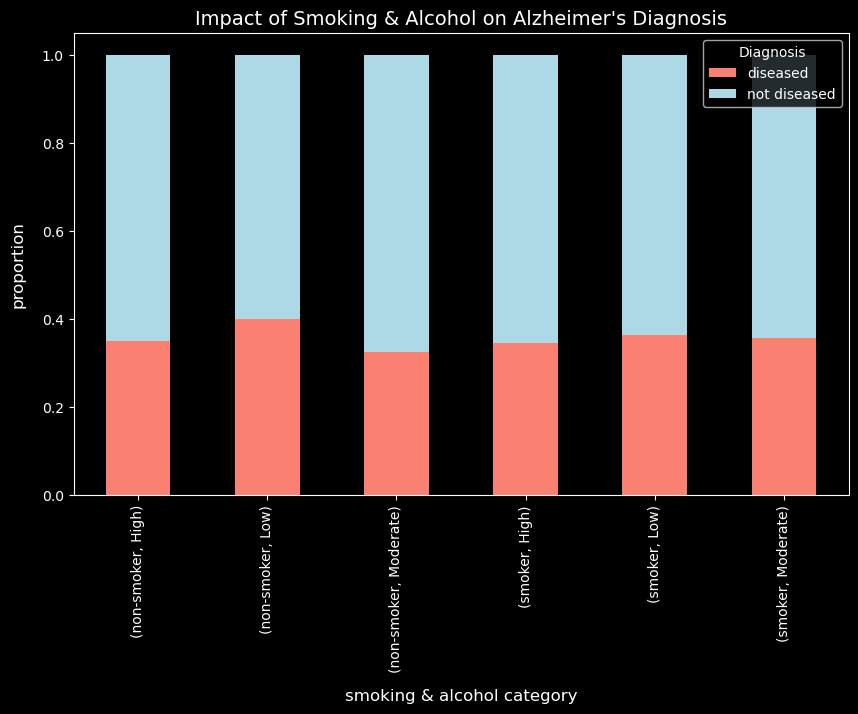

In [47]:
# analyzing the impact of smoking and alcohol consumption on disease by category

df.groupby(['Smoking', 'AlcoholCategory'])['Diagnosis'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True,
figsize=(10,6), color=['salmon', 'lightblue'])
plt.style.use("dark_background")
plt.xlabel('smoking & alcohol category', fontsize=12, labelpad=12) 
plt.ylabel('proportion', fontsize=12, labelpad=12) 
plt.title('Impact of Smoking & Alcohol on Alzheimer\'s Diagnosis', fontsize=14) 
plt.show()

In [48]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['EducationLevel'] = df['EducationLevel'].replace({'None': 0, 'High School': 1, "Bachelor's": 2, 'Higher': 3})
df['Smoking'] = df['Smoking'].replace({'non-smoker': 0, 'smoker': 1})
df['Diagnosis'] = df['Diagnosis'].replace({'not diseased': 0, 'diseased': 1})


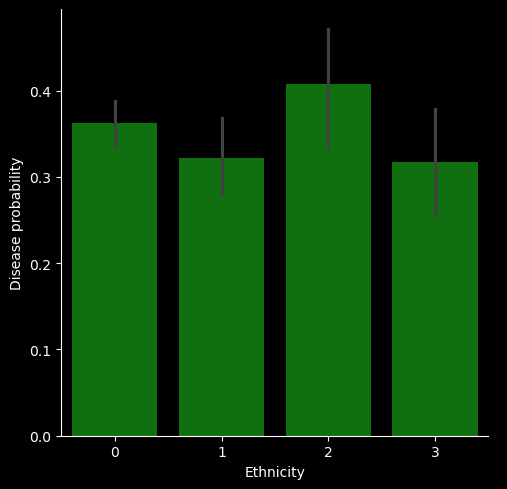

In [49]:
g=sns.catplot(x="Ethnicity",y="Diagnosis",data=df,kind="bar",color="green")
g.set_ylabels("Disease probability")
plt.show()

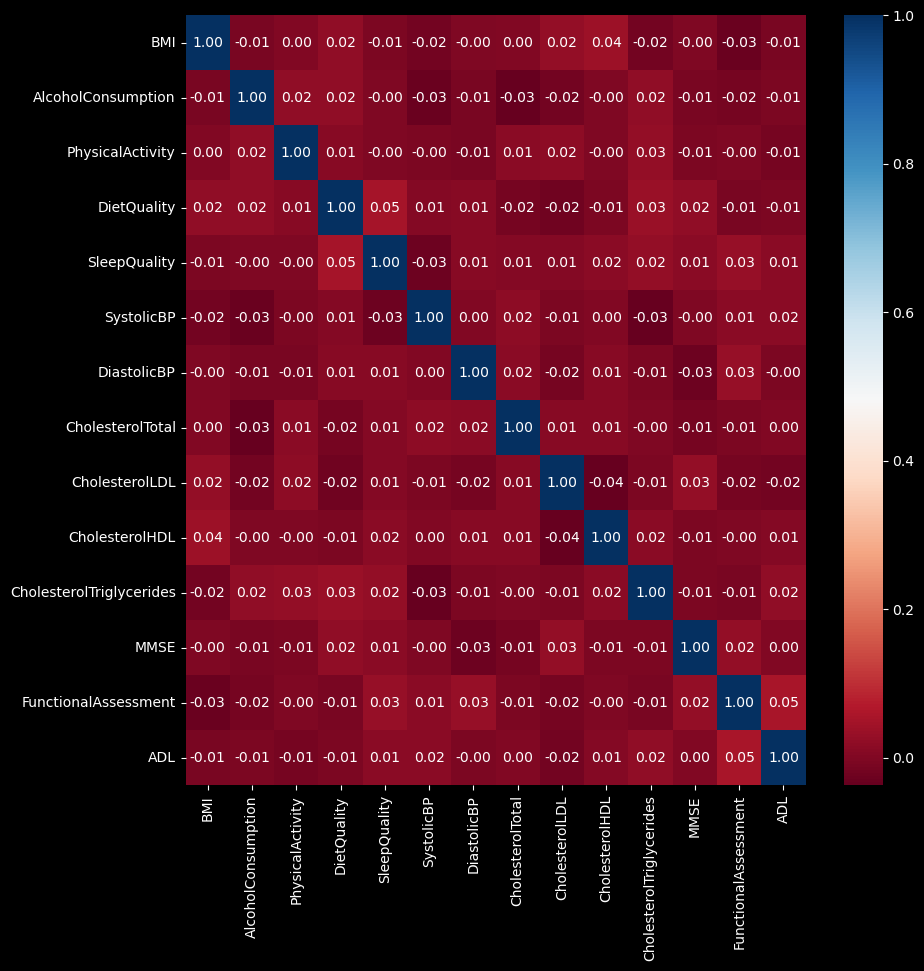

In [50]:
import seaborn as sns
list1=["BMI","AlcoholConsumption","PhysicalActivity","DietQuality","SleepQuality","SystolicBP","DiastolicBP","CholesterolTotal","CholesterolLDL",
          "CholesterolHDL","CholesterolTriglycerides","MMSE","FunctionalAssessment","ADL"]
plt.figure(figsize=(10,10))
sns.heatmap(df[list1].corr(),annot=True,fmt=".2f",cmap="RdBu")
plt.show()


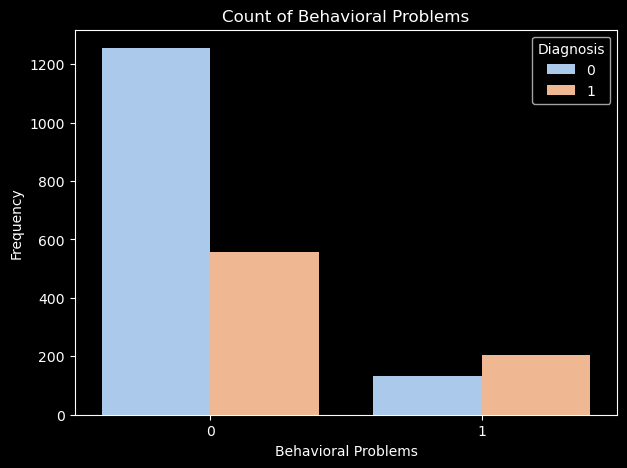

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
fig, axes = plt.subplots(figsize=(7, 5))

sns.countplot(x='BehavioralProblems', data=df, hue='Diagnosis', palette='pastel')
plt.title('Count of Behavioral Problems')  # Corrected title placement
plt.xlabel('Behavioral Problems')
plt.ylabel('Frequency')

plt.show()


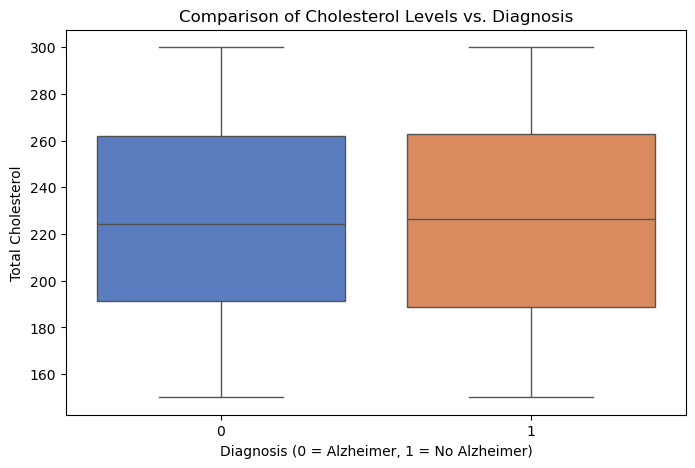

In [52]:
plt.style.use("default")
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Diagnosis'], y=df['CholesterolTotal'], palette='muted')

# Titles and labels
plt.title("Comparison of Cholesterol Levels vs. Diagnosis")
plt.xlabel("Diagnosis (0 = Alzheimer, 1 = No Alzheimer)")
plt.ylabel("Total Cholesterol")

# Show plot
plt.show()

In [53]:
# Remove PatientID if present (since it's an identifier, not a feature)
if 'PatientID' in df.columns:
    df_numeric = df.drop(columns=['PatientID'])

In [54]:
# Ensure 'Diagnosis' is numeric
df['Diagnosis'] = df['Diagnosis'].astype(int)

In [55]:
# Define independent variables (X) and target variable (y)

X = df.drop(columns=['Diagnosis'], errors='ignore') 
y = df['Diagnosis']  # Target
X = df.drop(columns=['Diagnosis'], errors='ignore') 
y = df['Diagnosis'] if 'Diagnosis' in df_numeric.columns else None

In [56]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [57]:
# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [58]:
# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Age Group'], dtype='object')


In [60]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # FIXED
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

# Restore index and column names
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index
X_train_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and concatenate encoded ones
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)


In [61]:
# Feature Scaling (for better model performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Identify categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing steps
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),  # Fill missing values
    ('scaler', StandardScaler())  # Scale numerical data
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),  # Fill missing categorical values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine transformations
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Define models
models = {
    "Linear Regression": Pipeline([
        ("preprocessor", preprocessor),
        ("model", LinearRegression())]),
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor),
        ("model", DecisionTreeRegressor())]),
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators=100, random_state=42))]),
    "XGBoost": Pipeline([
        ("preprocessor", preprocessor),
        ("model", XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))])}

# Store results
results = {}

# Train and evaluate each model
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)  # Train the pipeline
    y_pred = pipeline.predict(X_test)  # Make predictions
    accuracy = r2_score(y_test, y_pred)  # Calculate R² score
    
    results[name] = accuracy
    print(f"{name} Accuracy (R² Score): {accuracy:.4f}")  # Print accuracy

# Print all results
print("\nFinal Model Accuracies:")
print(results)

Linear Regression Accuracy (R² Score): 0.4074
Decision Tree Accuracy (R² Score): 0.8275
Random Forest Accuracy (R² Score): 0.8935
XGBoost Accuracy (R² Score): 0.8604

Final Model Accuracies:
{'Linear Regression': 0.40737840995863106, 'Decision Tree': 0.8275170477336542, 'Random Forest': 0.8934836601307189, 'XGBoost': 0.8603831070198291}


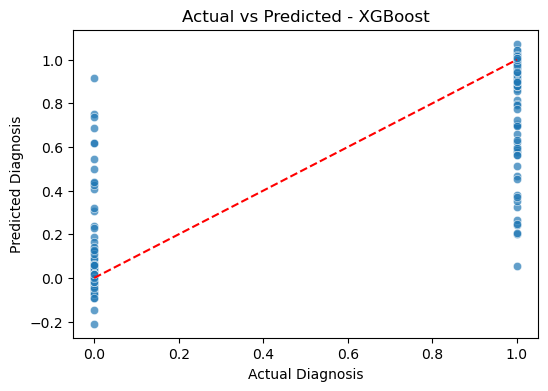

In [65]:
# Plot Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Diagnosis")
plt.ylabel("Predicted Diagnosis")
plt.title(f"Actual vs Predicted - {name}")
plt.show()

In [66]:
# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0747
Mean Squared Error (MSE): 0.0320
Root Mean Squared Error (RMSE): 0.1789
R² Score: 0.8604


# Final insights From Model Performance

• Dataset size: 2,149 records, 35 features covering medical, lifestyle, and behavioral data.

• Cognitive decline indicators (forgetfulness, task difficulty, confusion) are prominent in diagnosed cases.

• Health factors like poor diet, low physical activity, and smoking may contribute to Alzheimer’s risk.

• Elderly individuals, especially those with behavioral changes and memory issues, show higher diagnosis rates.

• ADL (Activities of Daily Living) scores help distinguish severity and impact on daily function.

• Preprocessed and anonymized data is suitable for machine learning models.

• Potential use in early detection models and risk profiling.